# Assignment 2. Classification Metrics
1. 주어진 데이터(sampled_data.csv)에 대해 로지스틱 회귀모형(sklearn 패키지 사용 가능)을 적합해보고, Mean Accuracy 찍어보기
2. Confusion Matrix 찍어보기 → Mean Accuracy와 비교
3. Logistic은 cut-off를 어떻게 설정하느냐에 따라 Classification의 성능이 달라짐. 최적의 Cut-off를 ROC 커브를 사용해서 찾아보세요.   
또한 새롭게 찾은 cut-off로 예측을 다시 진행하여 성능 평가를 진행하세요(mean accuracy 제외).

---

## Load Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('../../2주차_회귀분석_로지스틱/로지스틱/assignment1/sampled_data.csv')

X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
df.shape

(28480, 31)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


In [7]:
df['Class'].value_counts()

0    28428
1       52
Name: Class, dtype: int64

df['Class'] == 0 인 비율 > 0.9981741573033708
df['Class'] == 1 인 비율 > 0.0018258426966292136


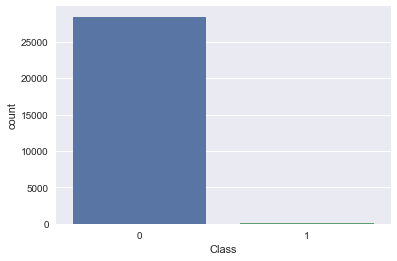

In [8]:
# label이 매우 불균형한 데이터
sns.countplot(df['Class'])

print("df['Class'] == 0 인 비율 > {}".format((df['Class'] == 0).sum()/df.shape[0]))
print("df['Class'] == 1 인 비율 > {}".format((df['Class'] == 1).sum()/df.shape[0]))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28480 entries, 0 to 28479
Data columns (total 31 columns):
Time      28480 non-null int64
V1        28480 non-null float64
V2        28480 non-null float64
V3        28480 non-null float64
V4        28480 non-null float64
V5        28480 non-null float64
V6        28480 non-null float64
V7        28480 non-null float64
V8        28480 non-null float64
V9        28480 non-null float64
V10       28480 non-null float64
V11       28480 non-null float64
V12       28480 non-null float64
V13       28480 non-null float64
V14       28480 non-null float64
V15       28480 non-null float64
V16       28480 non-null float64
V17       28480 non-null float64
V18       28480 non-null float64
V19       28480 non-null float64
V20       28480 non-null float64
V21       28480 non-null float64
V22       28480 non-null float64
V23       28480 non-null float64
V24       28480 non-null float64
V25       28480 non-null float64
V26       28480 non-null float64
V2

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,...,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000
mean,94643.457198,-0.009853,0.002283,0.023257,0.007209,-0.002983,0.001408,0.001781,-0.001175,-0.002359,...,0.001560,0.001996,0.005655,0.000389,0.000116,-0.003401,-0.002118,-0.003817,88.245961,0.001826
std,47588.652617,1.921643,1.636421,1.485803,1.419452,1.353022,1.321492,1.190563,1.180562,1.092514,...,0.740709,0.721913,0.569450,0.610268,0.515988,0.484652,0.395407,0.304311,235.775903,0.042692
min,12.000000,-33.669917,-47.429676,-25.188773,-5.600607,-25.025820,-20.054615,-28.011293,-37.353443,-8.960922,...,-15.790142,-8.887017,-14.767079,-2.814898,-3.768740,-1.658162,-9.793568,-8.656570,0.000000,0.000000
25%,54244.000000,-0.948748,-0.590151,-0.850020,-0.842293,-0.696015,-0.766332,-0.551560,-0.205536,-0.640165,...,-0.226194,-0.532159,-0.160307,-0.354593,-0.316866,-0.329481,-0.071556,-0.053896,5.750000,0.000000
50%,84099.500000,-0.004241,0.068011,0.207794,-0.005891,-0.057630,-0.269471,0.046837,0.020862,-0.053404,...,-0.029125,0.009972,-0.009117,0.040856,0.013365,-0.060068,0.000948,0.011243,21.980000,0.000000
75%,139340.250000,1.307201,0.799815,1.040033,0.751093,0.610578,0.401779,0.571420,0.327867,0.588938,...,0.186376,0.522956,0.148473,0.438138,0.349229,0.236058,0.089146,0.077542,77.200000,0.000000
max,172785.000000,2.439207,14.706335,4.079168,13.143668,29.016124,14.793318,26.237722,15.374630,8.933028,...,27.202839,4.725713,17.606637,3.563214,3.561216,2.992947,6.250240,15.726807,7541.700000,1.000000


In [9]:
# sns.pairplot(df)

### SMOTE

In [11]:
# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_sample(X, y)

Using TensorFlow backend.


In [12]:
# 원본 데이터와 SMOTE한 데이터의 사이즈 비교
print(X.shape)
print(X_smote.shape)

(28480, 30)
(56856, 30)


In [13]:
# 원본 데이터와 SMOTE한 데이터의 target 분포 비교
print(y.value_counts())
print(y_smote.value_counts())

0    28428
1       52
Name: Class, dtype: int64
1    28428
0    28428
Name: Class, dtype: int64


## Modeling & Test

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [16]:
# train, test data 분리

# 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
# StandardScaling한 데이터
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss_scaled, y, random_state=0, stratify=y)
# MinMaxScaling한 데이터
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm_scaled, y, random_state=0, stratify=y)
# SMOTE했던 데이터
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, random_state=0, stratify=y_smote)

In [26]:
print('----- ORIGINAL DATA -----')
print('y_train의 label의 분포')
print('y_train == 0 인 비율 = {}'.format((y_train == 0).sum()/len(y_train)))
print('y_train == 1 인 비율 = {}'.format((y_train == 1).sum()/len(y_train)), '\n')

print('y_test의 label의 분포')
print('y_test == 0 인 비율 = {}'.format((y_test == 0).sum()/len(y_test)))
print('y_test == 1 인 비율 = {}'.format((y_test == 1).sum()/len(y_test)), '\n')

----- ORIGINAL DATA -----
y_train의 label의 분포
y_train == 0 인 비율 = 0.9981741573033708
y_train == 1 인 비율 = 0.0018258426966292136 

y_test의 label의 분포
y_test == 0 인 비율 = 0.9981741573033708
y_test == 1 인 비율 = 0.0018258426966292136 



In [27]:
print('----- SMOTE DATA -----')
print('y_train의 label의 분포')
print('y_train == 0 인 비율 = {}'.format((y_smote_train == 0).sum()/len(y_smote_train)))
print('y_train == 1 인 비율 = {}'.format((y_smote_train == 1).sum()/len(y_smote_train)), '\n')

print('y_test의 label의 분포')
print('y_test == 0 인 비율 = {}'.format((y_smote_test == 0).sum()/len(y_smote_test)))
print('y_test == 1 인 비율 = {}'.format((y_smote_test == 1).sum()/len(y_smote_test)), '\n')

----- SMOTE DATA -----
y_train의 label의 분포
y_train == 0 인 비율 = 0.5
y_train == 1 인 비율 = 0.5 

y_test의 label의 분포
y_test == 0 인 비율 = 0.5
y_test == 1 인 비율 = 0.5 



### train_test_split 후 scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [22]:
# 평균 0, 표준편차 1로 scaling -> (x-mean)/std
standard_scaler.fit(X_train)
X_ss_train = standard_scaler.transform(X_train)
X_ss_test  = standard_scaler.transform(X_test)
y_ss_train = y_train.copy()
y_ss_test  = y_test.copy()

# min 0, max 1으로 scaling -> (x-min)/(max-min)
minmax_scaler.fit(X_train)
X_mm_train = minmax_scaler.transform(X_train)
X_mm_test  = minmax_scaler.transform(X_test)
y_mm_train = y_train.copy() 
y_mm_test  = y_test.copy()

In [17]:
# test 데이터로 교차점증 했을 때의 평균 auc_score와 recall_score 비교
def get_cross_val_score(X_train, y_train):
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train, y_train)
    
    accuracy = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    auc = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='roc_auc').mean()
    recall = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='recall').mean()
    
    print(f'accuracy = {accuracy}, recall = {recall}, auc = {auc}')

In [28]:
def get_test_score(X_train, X_test, y_train, y_test):
    lr_clf = LogisticRegression() # model 객체 생성
    lr_clf.fit(X_train, y_train) # train data로 training
    y_pred = lr_clf.predict(X_test) # test data로 predict
    y_pred_proba = lr_clf.predict_proba(X_test)[:, 1] # test data에서 label(0, 1)로 예측할 각각의 확률
    
    confusion = confusion_matrix(y_test, y_pred)
    print(f'confusion matrix = \n {confusion}') # confusion matrix
    
    accuracy = accuracy_score(y_test, y_pred) # accuracy (전체데이터 중 예측과 실제가 일치하는 데이터의 비율)
    recall = recall_score(y_test, y_pred) # recall (실제 1 데이터 중 1이라고 예측한 비율)
    precision = precision_score(y_test, y_pred) # precision (예측을 1로 한 데이터 중 실제 1인 데이터의 비율)
    f1score = f1_score(y_test, y_pred) # f1score (recall과 precision을 결합한 지표)
    auc = roc_auc_score(y_test, y_pred_proba) # auc (roc curve아래의 면적으로, 0.5~1사이의 범위를 갖는다. 1에 가까울수록 좋다고 판단)

    print(f'accuracy = {accuracy}')
    print(f'recall = {recall}, precision = {precision}, f1 score = {f1score}')
    print(f'auc = {auc} \n')

In [29]:
def draw_roc_curve(X_train, X_test, y_train, y_test):
    # train data로 학습시키고, test data의 predict_proba 이용해 ROC curve를 그리는 함수
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train, y_train)
    pred_proba = lr_clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba) 
    #print(fpr, tpr)
    plt.plot(fpr, tpr)

In [30]:
def change_thresholds(X_train, X_test, y_train, y_test, label):
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train, y_train)

    thresholds = np.arange(0, 1, 0.05)[1:] # 0.05 ~ 0.95 사이, 0.05 간격의 threshold 값

    predict_proba = lr_clf.predict_proba(X_test)[:, 1]
    scores = []
    for threshold in thresholds:
        predict = [1 if proba>threshold else 0 for proba in predict_proba]
        scores.append(recall_score(y_test, predict))
    # threshold를 변경해가며 predict 값을 구하고, 이 때의 recall_score를 시각화
    plt.plot(thresholds, scores, label=label)

#### Q1. 주어진 데이터(sampled_data.csv)에 대해 로지스틱 회귀모형(sklearn 패키지 사용 가능)을 적합해보고, Mean Accuracy 찍어보기

In [21]:
# train data로 교차검증했을 때의 score

# 본 데이터의 경우 여러가지 feature 정보를 통해 이 거래가 사기인 지 아닌지를 판별하는 것이 목적입니다.
# 따라서 실제 사기인 경우를 사기라고 예측하는 것이 가장 중요합니다.
# 그러므로 실제 False 중 예측 또한 False로 한 데이터의 비율을 나타내는 'recall'을 주된 평가지표로 사용해야 합니다.
# (또한 label이 imbalance한 데이터셋에서 accuracy를 주된 평가지표를 사용하게 되면 결과 해석에 왜곡이 발생하게 됩니다.)

# 원본 데이터, standard scaling한 데이터, minmax scaling한 데이터, SMOTE한 데이터를 돌려본 결과
# recall은 smote를 실시한 데이터에서 좋게 나왔습니다. 
# 아무래도 원본 데이터의 경우 사기가 아닌 데이터가 압도적으로 많았기 때문에 사기 데이터를 사기가 아니라고 예측해버린 경우가 많기 때문인 것으로 예측됩니다.

get_cross_val_score(X_train, y_train)
get_cross_val_score(X_ss_train, y_ss_train)
get_cross_val_score(X_mm_train, y_mm_train)
get_cross_val_score(X_smote_train, y_smote_train)

accuracy = 0.9985955056179776, recall = 0.5642857142857143, auc = 0.8539220410769
accuracy = 0.9989232209737828, recall = 0.5892857142857142, auc = 0.9503109170480964
accuracy = 0.9985018726591761, recall = 0.25357142857142856, auc = 0.9769458140471314
accuracy = 0.9810281366497747, recall = 0.9801604094587253, auc = 0.9984303210977131


#### Q2. Confusion Matrix 찍어보기 → Mean Accuracy와 비교
(test데이터에서의 confusion matrix와 accuracy를 비교하겠습니다)

In [22]:
# train data로 학습하고, test 데이터의 성능 평가
get_test_score(X_train, X_test, y_train, y_test)
get_test_score(X_ss_train, X_ss_test, y_ss_train, y_ss_test)
get_test_score(X_mm_train, X_mm_test, y_mm_train, y_mm_test)
get_test_score(X_smote_train, X_smote_test, y_smote_train, y_smote_test)

# 이 데이터는 0인 데이터의 비율이 0.998, 1인 데이터의 비율은 0.001으로 매우 imbalance한 데이터이다. 
# 이러한 label이 매우 imbalance한 데이터는 0으로 예측해도 accuracy는 매우 높게 나오기 때문에 평가지표로서 적합하지 않다.
# 실제 test data의 accuracy를 보아도 0.97~0.99로 매우 높게 나오는 것을 볼 수 있다.
# 하지만 이에 비해 recall과 precision score는 매우 낮음을 확인할 수 있다.
# confusion matrix를 봤을 때 실제 1인 데이터를 0으로 예측한 경우가 많다.
# 주대각선 요소 외의 영역에 속하는 데이터의 개수를 더 줄여보도록 하자.

# 그리고 여기서 성능이 좋아보이는 데이터는 StandardScaling한 데이터이다.
# StandardScaling한 데이터의 threshold를 변경해가면서 score를 더 높여보도록 하자.

confusion matrix = 
 [[7100    7]
 [   6    7]]
accuracy = 0.9981741573033708
recall = 0.5384615384615384, precision = 0.5, f1 score = 0.5185185185185186
auc = 0.8970029548332631 

confusion matrix = 
 [[7106    1]
 [   3   10]]
accuracy = 0.999438202247191
recall = 0.7692307692307693, precision = 0.9090909090909091, f1 score = 0.8333333333333333
auc = 0.9922178567176456 

confusion matrix = 
 [[7106    1]
 [   9    4]]
accuracy = 0.9985955056179775
recall = 0.3076923076923077, precision = 0.8, f1 score = 0.4444444444444444
auc = 0.9979543462025522 

confusion matrix = 
 [[6944  163]
 [ 210 6897]]
accuracy = 0.973758266497819
recall = 0.9704516673701984, precision = 0.9769121813031162, f1 score = 0.9736712077362886
auc = 0.9968823853136864 



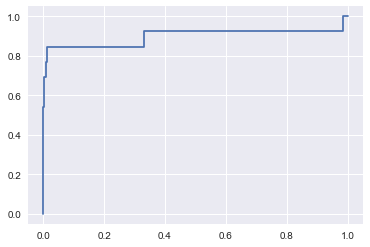

In [31]:
draw_roc_curve(X_train, X_test, y_train, y_test) 

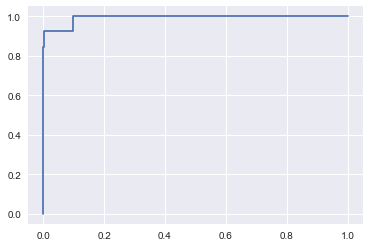

In [32]:
draw_roc_curve(X_ss_train, X_ss_test, y_ss_train, y_ss_test)

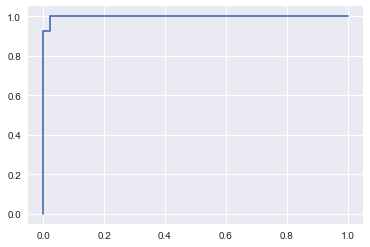

In [33]:
draw_roc_curve(X_mm_train, X_mm_test, y_mm_train, y_mm_test)

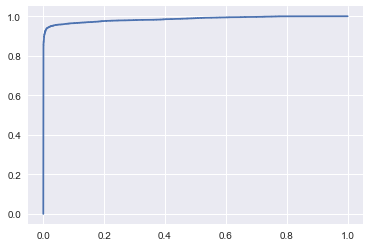

In [34]:
draw_roc_curve(X_smote_train, X_smote_test, y_smote_train, y_smote_test)

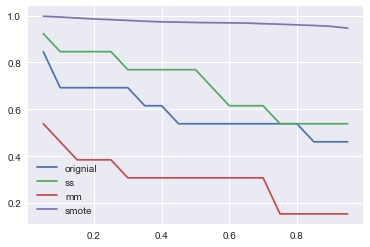

In [27]:
# thresholds를 바꿔가며 test 했을 때의 recall score
change_thresholds(X_train, X_test, y_train, y_test, 'orignial')
change_thresholds(X_ss_train, X_ss_test, y_ss_train, y_ss_test, 'ss')
change_thresholds(X_mm_train, X_mm_test, y_mm_train, y_mm_test, 'mm')
change_thresholds(X_smote_train, X_smote_test, y_smote_train, y_smote_test, 'smote')
plt.legend()

In [28]:
def set_threshold(X_train, X_test, y_train, y_test, threshold):
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train, y_train)
    pred_proba = lr_clf.predict_proba(X_test)[:, 1]
    predict = [1 if proba>threshold else 0 for proba in pred_proba]
    
    print('confusion matrix \n', confusion_matrix(y_test, predict))
    recall = recall_score(y_test, predict)
    precision = precision_score(y_test, predict)
    print(f'recall = {recall}, precision = {precision}')
    
    print('auc = {}'.format(roc_auc_score(y_test, pred_proba)))
    
    return recall, precision

In [29]:
# StandardScaling된 데이터로 threshold 변경해가며 recall, precision score 체크
threshold = np.arange(0, 1, 0.05)
recalls = []
precisions = []

for i in threshold:
    print(f'--------------- threshold = {i}---------------')
    recall, precision = set_threshold(X_ss_train, X_ss_test, y_ss_train, y_ss_test, i)
    recalls.append(recall)
    precisions.append(precision)

--------------- threshold = 0.0---------------
confusion matrix 
 [[   0 7107]
 [   0   13]]
recall = 1.0, precision = 0.0018258426966292136
auc = 0.9922178567176456
--------------- threshold = 0.05---------------
confusion matrix 
 [[7096   11]
 [   1   12]]
recall = 0.9230769230769231, precision = 0.5217391304347826
auc = 0.9922178567176456
--------------- threshold = 0.1---------------
confusion matrix 
 [[7104    3]
 [   2   11]]
recall = 0.8461538461538461, precision = 0.7857142857142857
auc = 0.9922178567176456
--------------- threshold = 0.15000000000000002---------------
confusion matrix 
 [[7104    3]
 [   2   11]]
recall = 0.8461538461538461, precision = 0.7857142857142857
auc = 0.9922178567176456
--------------- threshold = 0.2---------------
confusion matrix 
 [[7105    2]
 [   2   11]]
recall = 0.8461538461538461, precision = 0.8461538461538461
auc = 0.9922178567176456
--------------- threshold = 0.25---------------
confusion matrix 
 [[7105    2]
 [   2   11]]
recall = 0.

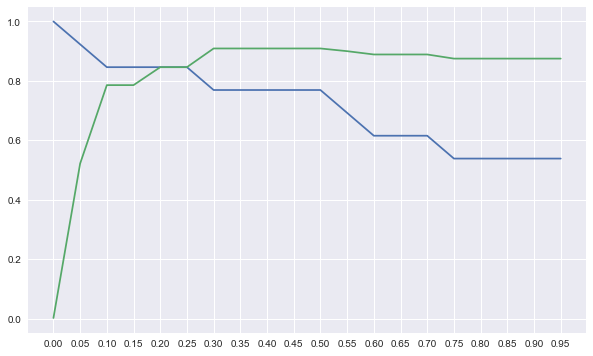

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(threshold, recalls)
plt.plot(threshold, precisions)
plt.xticks(threshold)
plt.show()

# threshold가 0.20 혹은 0.25일 때가 recall, precision 둘 다 0.84정도로 어느 정도 괜찮아 보인다.
# auc score 또한 0.99 정도로 높게 나온다.

In [31]:
set_threshold(X_ss_train, X_ss_test, y_ss_train, y_ss_test, 0.25) # standardscaling한 데이터

confusion matrix 
 [[7105    2]
 [   2   11]]
recall = 0.8461538461538461, precision = 0.8461538461538461
auc = 0.9922178567176456


(0.8461538461538461, 0.8461538461538461)

--------------- threshold = 0.0---------------
confusion matrix 
 [[   0 7111]
 [   0    9]]
recall = 1.0, precision = 0.0012640449438202246
auc = 0.999890623290989
--------------- threshold = 0.05---------------
confusion matrix 
 [[7104    7]
 [   1    8]]
recall = 0.8888888888888888, precision = 0.5333333333333333
auc = 0.999890623290989
--------------- threshold = 0.1---------------
confusion matrix 
 [[7106    5]
 [   1    8]]
recall = 0.8888888888888888, precision = 0.6153846153846154
auc = 0.999890623290989
--------------- threshold = 0.15000000000000002---------------
confusion matrix 
 [[7108    3]
 [   1    8]]
recall = 0.8888888888888888, precision = 0.7272727272727273
auc = 0.999890623290989
--------------- threshold = 0.2---------------
confusion matrix 
 [[7108    3]
 [   1    8]]
recall = 0.8888888888888888, precision = 0.7272727272727273
auc = 0.999890623290989
--------------- threshold = 0.25---------------
confusion matrix 
 [[7108    3]
 [   1    8]]
recall = 0.88888

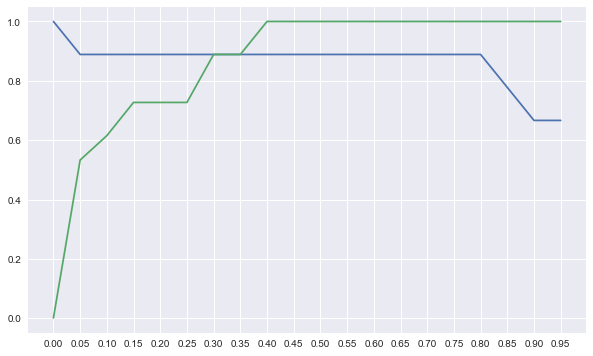

In [32]:
# label의 분포가 매우 imbalance하기 때문에 
# 이전의 train, test 데이터 분리할 때 label이 동일하게 분포하도록 stratify 옵션을 주었다.
# 아래는 stratify 옵션을 주지 않았음에도 불구하고 test data에서의 score가 이전보다 전반적으로 더 높다는 것을 확인할 수 있다.
# threshold = 0.5로 설정했을 때에는 recall = 0.8888, precision = 1.0, auc = 0.9999 로 매우 높았다.

X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss_scaled, y, random_state=0)

threshold = np.arange(0, 1, 0.05)
recalls = []
precisions = []

for i in threshold:
    print(f'--------------- threshold = {i}---------------')
    recall, precision = set_threshold(X_ss_train, X_ss_test, y_ss_train, y_ss_test, i)
    recalls.append(recall)
    precisions.append(precision)
    
plt.figure(figsize=(10, 6))
plt.plot(threshold, recalls)
plt.plot(threshold, precisions)
plt.xticks(threshold)
plt.show()